## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mites\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv(r'C:\Users\mites\Desktop\Ironhack\Week7\Day2Project\project-3-nlp\dataset\training_data.csv', sep="\t", names=["label", "text"])

In [6]:
df

,label,text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...
...,...,...
34147,1,tears in rain as thais gather for late king's ...
34148,1,pyongyang university needs non-u.s. teachers a...
34149,1,philippine president duterte to visit japan ah...
34150,1,japan's abe may have won election\tbut many do...


## Data Preprocessing

In [10]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv(r'C:\Users\mites\Desktop\Ironhack\Week7\Day2Project\project-3-nlp\dataset\training_data.csv', sep="\t", names=["label", "text"])

#  BASIC PREPROCESSING FUNCTION
def preprocess(text):
    text = text.lower()                                # Lowercasing
    text = re.sub(r"[^a-z0-9\s]", " ", text)           # Remove punctuation & symbols
    text = re.sub(r"\s+", " ", text).strip()           # Remove extra spaces
    return text

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess)

#  TF-IDF VECTORISATION
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),       # unigrams + bigrams
    stop_words="english"     # built-in English stopwords
)

X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

print("TF-IDF shape:", X.shape)
print(df.head())


TF-IDF shape: (34152, 182681)
   label                                               text  \
0      0  donald trump sends out embarrassing new year‚s...   
1      0  drunk bragging trump staffer started russian c...   
2      0  sheriff david clarke becomes an internet joke ...   
3      0  trump is so obsessed he even has obama‚s name ...   
4      0  pope francis just called out donald trump duri...   

                                          clean_text  
0  donald trump sends out embarrassing new year s...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke becomes an internet joke ...  
3  trump is so obsessed he even has obama s name ...  
4  pope francis just called out donald trump duri...  


## Dividing Training Dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

# Split the already vectorized data (for models trained outside the pipeline)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X,      # already vectorized data
    y,      # numeric labels
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Split the clean text data (for pipelines that include TfidfVectorizer)
X_train_text, X_test_text, _, _ = train_test_split(
    df["clean_text"],  # Use the clean text column
    df["label"],       # Use the numeric labels (y_train, y_test are already defined above)
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("X_train_raw shape:", X_train_raw.shape)
print("X_test_raw shape:", X_test_raw.shape)
print("X_train_text shape:", X_train_text.shape)
print("X_test_text shape:", X_test_text.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_raw shape: (27321, 182681)
X_test_raw shape: (6831, 182681)
X_train_text shape: (27321,)
X_test_text shape: (6831,)
y_train shape: (27321,)
y_test shape: (6831,)


## Feature Extraction TF-IDF and Experiment with their Parameters ((n-grams, max_df, min_df, max_features, custom tokenizer, etc.))

In [ ]:
# Try different n-grams:

ngram_range=(1,1)   # best for simple models
ngram_range=(1,2)   # improves accuracy
ngram_range=(1,3)   # captures phrases but increases size

# Try different df thresholds:

max_df=0.95   # remove terms in 95% of documents
min_df=2      # remove rare terms


# Try different max features:

max_features=2000
max_features=5000
max_features=10000



## Model Training

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_raw, y_train)
y_pred_lr = lr.predict(X_test_raw)

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_raw, y_train)
y_pred_nb = nb.predict(X_test_raw)

In [ ]:
# Support Vector Machine
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_raw, y_train)
y_pred_svm = svm.predict(X_test_raw)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_raw, y_train)
y_pred_rf = rf.predict(X_test_raw)


In [ ]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)
xgb.fit(X_train_raw, y_train)
y_pred_xgb = xgb.predict(X_test_raw)


In [ ]:



###  Evaluate all models  ###

from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': lr,
    'Naive Bayes': nb,
    'SVM': svm,
    'Random Forest': rf,
    'XGBoost': xgb
}

for name, model in models.items():
    preds = model.predict(X_test_raw)
    print("-----", name, "-----")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))

----- Logistic Regression -----
Accuracy: 0.9319279754062363
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831

----- Naive Bayes -----
Accuracy: 0.9364661103791538
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3515
           1       0.95      0.92      0.93      3316

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831

----- SVM -----
Accuracy: 0.9430537256624213
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3515
           1       0.93      0.95      0.94      3316

    accuracy           

## Model Acccuracy score comparison

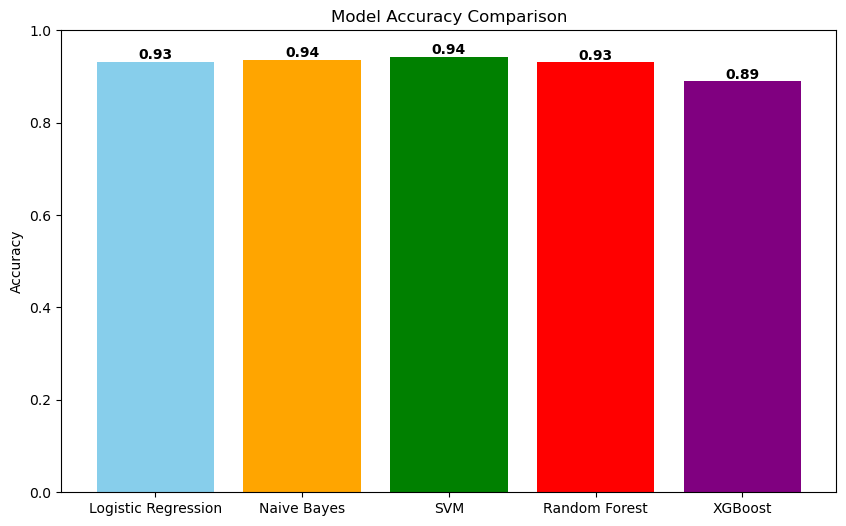

In [ ]:
import matplotlib.pyplot as plt

# Models and their accuracies
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "XGBoost"]
accuracies = [0.9319, 0.9365, 0.9431, 0.9303, 0.8892]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies, color=['skyblue','orange','green','red','purple'])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add accuracy labels on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{acc:.2f}", ha='center', fontweight='bold')

plt.show()


## Hyperparameter Training

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# -----------------------------
#  Create a pipeline with placeholder classifier
# -----------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())  # placeholder; will tune to try both classifiers
])

# -----------------------------
#  Define hyperparameter grid
# -----------------------------
param_grid = [
    {   # Logistic Regression parameters
        'tfidf__ngram_range': [(1,1), (1,2)],
        'tfidf__max_df': [0.75, 0.85, 1.0],
        'tfidf__min_df': [1, 3, 5],
        'tfidf__max_features': [5000, 6000, 10000],
        'clf': [LogisticRegression(max_iter=2000, solver='liblinear')],
        'clf__C': [0.1, 1, 10]
    },
    {   # MultinomialNB parameters
        'tfidf__ngram_range': [(1,1), (1,2)],
        'tfidf__max_df': [0.75, 0.85, 1.0],
        'tfidf__min_df': [1, 3, 5],
        'tfidf__max_features': [5000, 6000, 10000],
        'clf': [MultinomialNB()],
        'clf__alpha': [0.5, 1.0, 1.5]
    }
    
]

# -----------------------------
#  Run GridSearchCV
# -----------------------------
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='f1'
)

# Use X_train_text for fitting the pipeline with TfidfVectorizer
grid_search.fit(X_train_text, y_train)

# -----------------------------
# Evaluate the best model
# -----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_text)

print("Best Hyperparameters:\n", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


NameError: name 'X_train_text' is not defined

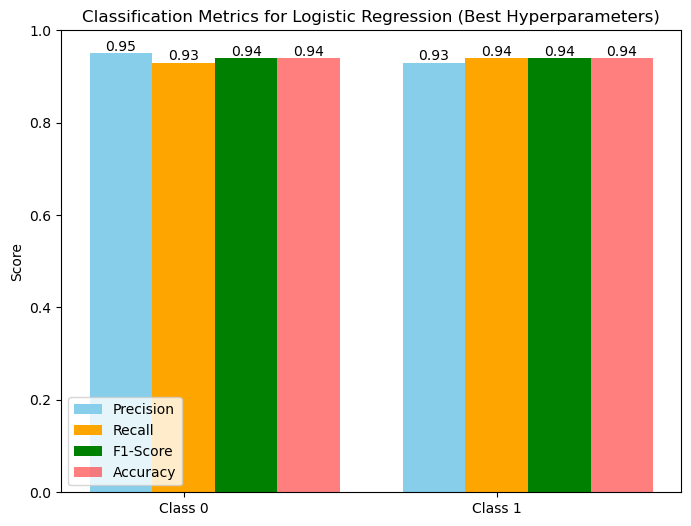

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classes
classes = ['Class 0', 'Class 1']

# Metrics from your report
precision = [0.95, 0.93]
recall = [0.93, 0.94]
f1_score = [0.94, 0.94]
accuracy = [0.94, 0.94]  # same for both classes (overall accuracy)

x = np.arange(len(classes))  # label locations
width = 0.2  # width of bars

plt.figure(figsize=(8,6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')
# Optionally include accuracy as a separate bar
plt.bar(x + 2*width, accuracy, width, label='Accuracy', color='red', alpha=0.5)

plt.xticks(x, classes)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Classification Metrics for Logistic Regression (Best Hyperparameters)')
plt.legend()

# Add value labels
for i in range(len(classes)):
    plt.text(x[i] - width, precision[i]+0.005, f"{precision[i]:.2f}", ha='center')
    plt.text(x[i], recall[i]+0.005, f"{recall[i]:.2f}", ha='center')
    plt.text(x[i] + width, f1_score[i]+0.005, f"{f1_score[i]:.2f}", ha='center')
    plt.text(x[i] + 2*width, accuracy[i]+0.005, f"{accuracy[i]:.2f}", ha='center')

plt.show()


## Algorithm Comparison

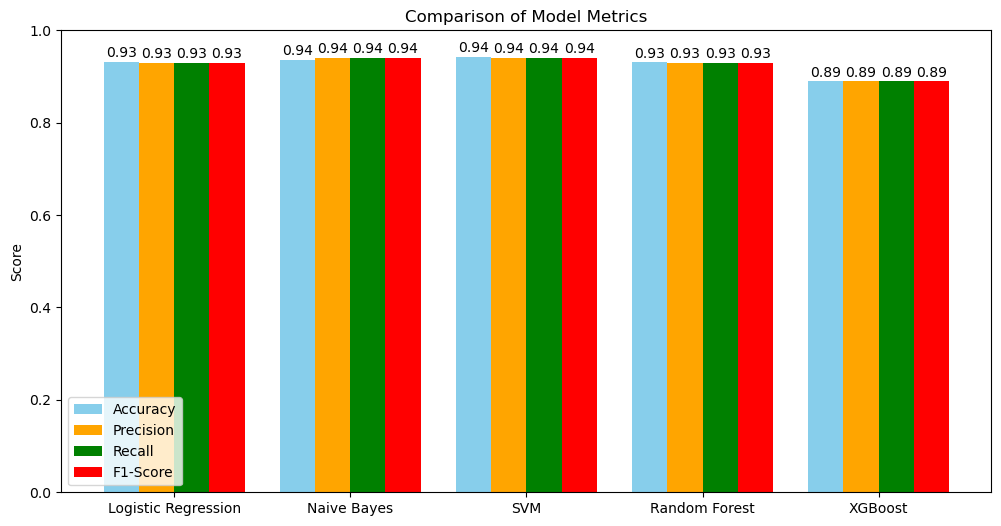

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "XGBoost"]

# Metrics
accuracy = [0.9319, 0.9365, 0.9431, 0.9303, 0.8892]
precision = [0.93, 0.94, 0.94, 0.93, 0.89]  # approximate average from your reports
recall = [0.93, 0.94, 0.94, 0.93, 0.89]     # approximate average from your reports
f1_score = [0.93, 0.94, 0.94, 0.93, 0.89]   # approximate average from your reports

x = np.arange(len(models))  # label locations
width = 0.2  # width of bars

plt.figure(figsize=(12,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='orange')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='green')
plt.bar(x + 1.5*width, f1_score, width, label='F1-Score', color='red')

plt.xticks(x, models)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Comparison of Model Metrics')
plt.legend()

# Add value labels on top
for i in range(len(models)):
    plt.text(x[i] - 1.5*width, accuracy[i]+0.01, f"{accuracy[i]:.2f}", ha='center')
    plt.text(x[i] - 0.5*width, precision[i]+0.01, f"{precision[i]:.2f}", ha='center')
    plt.text(x[i] + 0.5*width, recall[i]+0.01, f"{recall[i]:.2f}", ha='center')
    plt.text(x[i] + 1.5*width, f1_score[i]+0.01, f"{f1_score[i]:.2f}", ha='center')

plt.show()


## Comparing Models and choosing the best one

In [ ]:
# ❗ Skip TF-IDF because your X_train is already vectorized
X_train_tfidf = X_train_raw
X_test_tfidf = X_test_raw

# -----------------------------
# 2. LIST OF MODELS
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM (LinearSVC)": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "SVM (LinearSVC)": {"C": [0.1, 1, 10]},
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0]},
    "Random Forest": {"n_estimators": [100, 300], "max_depth": [10, 20, None]},
    "XGBoost": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1], "max_depth": [4, 6]},
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")

    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_tfidf, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Accuracy: {acc}")

    results[name] = {"best_model": best_model, "accuracy": acc}

best_model_name = max(results, key=lambda x: results[x]["accuracy"])
print("\n🏆 BEST MODEL:", best_model_name)
print("🔥 Accuracy:", results[best_model_name]["accuracy"])



🔍 Tuning Logistic Regression...
Best Params for Logistic Regression: {'C': 10}
Accuracy: 0.9417362026057678

🔍 Tuning SVM (LinearSVC)...
Best Params for SVM (LinearSVC): {'C': 1}
Accuracy: 0.9430537256624213

🔍 Tuning MultinomialNB...
Best Params for MultinomialNB: {'alpha': 0.5}
Accuracy: 0.940272288098375

🔍 Tuning Random Forest...
Best Params for Random Forest: {'max_depth': None, 'n_estimators': 300}
Accuracy: 0.9298784950958864

🔍 Tuning XGBoost...
Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Accuracy: 0.8743961352657005

🏆 BEST MODEL: SVM (LinearSVC)
🔥 Accuracy: 0.9430537256624213


In [ ]:
conf = np.abs(svm.decision_function(X_test_raw)).mean()
print(f"Confidence: {conf:.4f}")

Confidence: 0.9101


## Prediction for the Test set

In [ ]:
import pandas as pd

# Assuming 'preprocess' function and 'vectorizer' object are available from previous cells

# Step 1: Load testing data correctly
# Assuming testing_data.csv has two tab-separated columns, similar to training_data.csv.
# The first column is a placeholder label (e.g., '2'), and the second is the text.
test_df = pd.read_csv('/content/testing_data.csv', sep="\t", names=["label", "text"])

# Step 2: Preprocess the text data in the test set using the existing preprocess function
# The preprocess function was defined in cell 695acb5f
test_df["clean_text"] = test_df["text"].apply(preprocess)

# Step 3: Vectorize the clean text using the *already fitted* TF-IDF vectorizer
# The vectorizer object was fitted on training data in cell 695acb5f
X_test_processed = vectorizer.transform(test_df["clean_text"])

# Step 4: Use your best model (SVM) to make predictions
model_to_use = svm  # 'svm' is the LinearSVC model trained and available in the kernel

test_preds = model_to_use.predict(X_test_processed)

# Step 5: Replace the 'label' column with predictions
# The original 'label' column in test_df (which contained '2's) is now updated with the predictions.
test_df['label'] = test_preds

# Step 6: Save updated CSV to ipynb. The output should ideally match the input format: tab-separated, no header.
out_path = 'testing_predictions_svm.ipynb'
test_df.to_csv(out_path, index=False, sep='\t', header=False)
print("Saved predictions to:", out_path)


Saved predictions to: testing_predictions_svm.ipynb
